In [1]:
import numpy as np
import pandas as pd
from biosppy.signals import emg
from biosppy import plotting
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.cluster import KMeans

In [2]:
import fileinput
for lines in fileinput.FileInput("NEWrest.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    print(lines)

In [3]:
rest = np.loadtxt('NEWrest.txt')

In [4]:
#Calculate RestAvg
restavg = np.average(rest)
restavg

0.09878296584522267

In [6]:
import fileinput
for lines in fileinput.FileInput("Newstrong.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    print(lines)

In [7]:
forceful = np.loadtxt('NEWstrong.txt')

In [8]:
forceful.size

9251

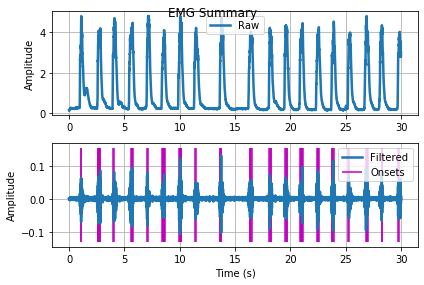

In [9]:
out = emg.emg(signal=forceful, sampling_rate=(forceful.size/30), show=True)

In [10]:
forceful1, forceful2,forceful3, forceful4 = np.split(forceful[0:9248],4)

In [11]:
forceful1.size

2312

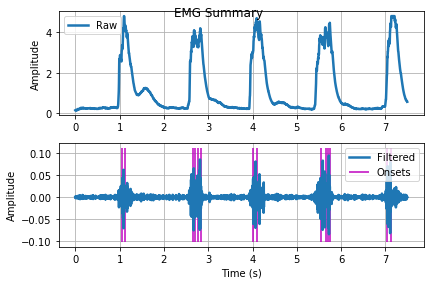

In [12]:
out = emg.emg(signal=forceful1, sampling_rate=(forceful.size/30), show=True)

In [15]:
classvar = np.zeros(len(forceful), dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
df = pd.DataFrame({'data':forceful, 'class':classvar, 'MAV':classvar, 'MAVS':classvar,'SSI':classvar, 'VAR':classvar,'RMS':classvar, 'WL':classvar, 'Trigger':classvar})


In [17]:
#df.loc[12:25,'class'] = 0

In [18]:
df

,data,class,MAV,MAVS,SSI,VAR,RMS,WL,Trigger
0,0.15,0,0,0,0,0,0,0,0
1,0.14,0,0,0,0,0,0,0,0
2,0.14,0,0,0,0,0,0,0,0
3,0.14,0,0,0,0,0,0,0,0
4,0.15,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9246,2.78,0,0,0,0,0,0,0,0
9247,2.91,0,0,0,0,0,0,0,0
9248,2.96,0,0,0,0,0,0,0,0
9249,2.95,0,0,0,0,0,0,0,0


In [19]:
for index, row in df.iterrows():
    if row['data'] > (1.4+restavg):
        df.loc[index, 'class'] = 1

In [20]:
with pd.option_context("display.max_rows", 1000):
    display(df)

,data,class,MAV,MAVS,SSI,VAR,RMS,WL,Trigger
0,0.15,0,0,0,0,0,0,0,0
1,0.14,0,0,0,0,0,0,0,0
2,0.14,0,0,0,0,0,0,0,0
3,0.14,0,0,0,0,0,0,0,0
4,0.15,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9246,2.78,1,0,0,0,0,0,0,0
9247,2.91,1,0,0,0,0,0,0,0
9248,2.96,1,0,0,0,0,0,0,0
9249,2.95,1,0,0,0,0,0,0,0


In [21]:
print(len(df.index))


9251


In [22]:
#Calculate MAV
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(df.index)):
            sum = sum + df.loc[index+index2, 'data']
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'MAV'] = sum/50

In [23]:
#Calculate MAVS
for index, row in df.iterrows():
    if(index+1 < len(df.index)):
        mavs = df.loc[index+1, 'MAV'] - df.loc[index, 'MAV']
        df.loc[index, 'MAVS'] = mavs

In [24]:
#Calculate SSI
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(df.index)):
            sum = sum + abs(df.loc[index+index2, 'data'])**2
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'SSI'] = sum

In [25]:
#Calculate VAR
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(df.index)):
            sum = sum + abs(df.loc[index+index2, 'data'])**2
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'VAR'] = sum/49

In [26]:
#Calculate RMS
for index, row in df.iterrows():
    tmp = df.loc[index, 'SSI']/50
    final = np.sqrt(tmp)
    df.loc[index, 'RMS'] = final

In [27]:
#Calculate WL
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2+1 < len(df.index)):
            sum = sum + abs((df.loc[index+index2, 'data'] + df.loc[index+index2+1, 'data']))
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'WL'] = sum/50

In [28]:
#Calculate Trigger
for index, row in df.iterrows():
    sum = 0
    for index2 in range(10):
        if(index+index2 < len(df.index)):
            sum = sum + df.loc[index+index2, 'class']
    if(index+index2 < len(df.index)):
        if(sum/10 > .75):
            df.loc[index+index2, 'Trigger'] = 1
        else:
            df.loc[index+index2, 'Trigger'] = 0

In [29]:
#df
with pd.option_context("display.max_rows", 1000):
    display(df)

,data,class,MAV,MAVS,SSI,VAR,RMS,WL,Trigger
0,0.15,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
1,0.14,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
2,0.14,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
3,0.14,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
4,0.15,0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0
...,...,...,...,...,...,...,...,...,...
9246,2.78,1,3.5088,-0.0180,620.4050,12.661327,3.522513,6.9996,1
9247,2.91,1,3.4908,-0.0152,614.3570,12.537898,3.505302,6.9664,1
9248,2.96,1,3.4756,-0.0158,609.2802,12.434290,3.490788,6.9354,1
9249,2.95,1,3.4598,-0.0144,603.9951,12.326431,3.475615,6.9052,1


In [30]:
for lines in fileinput.FileInput("NEWsoft.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    print(lines)
soft = np.loadtxt('NEWsoft.txt')

In [31]:
soft.size

9250

In [32]:
soft1, soft2, soft3, soft4 = np.split(soft[0:9248],4)

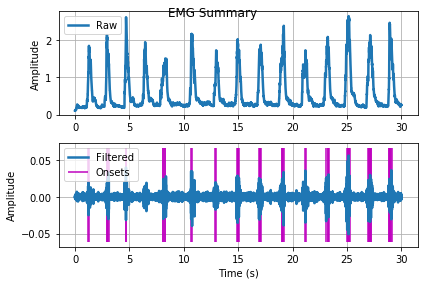

In [33]:
out = emg.emg(signal=soft, sampling_rate=(soft.size/30), show=True)

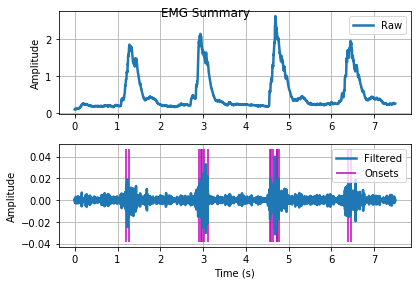

In [34]:
out = emg.emg(signal=soft1, sampling_rate=(soft.size/30), show=True)

In [35]:
classvar = np.zeros(len(soft), dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
dfs = pd.DataFrame({'data':soft, 'class':classvar, 'MAV':classvar, 'MAVS':classvar,'SSI':classvar, 'VAR':classvar,'RMS':classvar, 'WL':classvar, 'Trigger':classvar})

In [37]:
for index, row in dfs.iterrows():
    if row['data'] > (1.0+restavg):
        dfs.loc[index, 'class'] = 1

In [38]:
#dfs
#with pd.option_context("display.max_rows", 1000):
#    display(dfs)

In [39]:
#Calculate MAV
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfs.index)):
            sum = sum + dfs.loc[index+index2, 'data']
    if(index+index2 < len(df.index)):
        dfs.loc[index+index2, 'MAV'] = sum/50

In [40]:
#Calculate MAVS
for index, row in dfs.iterrows():
    if(index+1 < len(dfs.index)):
        mavs = dfs.loc[index+1, 'MAV'] - dfs.loc[index, 'MAV']
        dfs.loc[index, 'MAVS'] = mavs

In [41]:
#Calculate SSI
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfs.index)):
            sum = sum + abs(dfs.loc[index+index2, 'data'])**2
    if(index+index2 < len(dfs.index)):
        dfs.loc[index+index2, 'SSI'] = sum

In [42]:
#Calculate VAR
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfs.index)):
            sum = sum + abs(dfs.loc[index+index2, 'data'])**2
    if(index+index2 < len(dfs.index)):
        dfs.loc[index+index2, 'VAR'] = sum/49

In [43]:
#Calculate RMS
for index, row in dfs.iterrows():
    tmp = dfs.loc[index, 'SSI']/50
    final = np.sqrt(tmp)
    dfs.loc[index, 'RMS'] = final

In [44]:
#Calculate WL
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2+1 < len(dfs.index)):
            sum = sum + abs((dfs.loc[index+index2, 'data'] + dfs.loc[index+index2+1, 'data']))
    if(index+index2 < len(dfs.index)):
        dfs.loc[index+index2, 'WL'] = sum/50

In [45]:
#Calculate Trigger
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(10):
        if(index+index2 < len(dfs.index)):
            sum = sum + dfs.loc[index+index2, 'class']
    if(index+index2 < len(dfs.index)):
        if(sum/10 > .75):
            dfs.loc[index+index2, 'Trigger'] = 2
        else:
            dfs.loc[index+index2, 'Trigger'] = 0

In [46]:
#dfs
with pd.option_context("display.max_rows", 1000):
    display(dfs)

,data,class,MAV,MAVS,SSI,VAR,RMS,WL,Trigger
0,0.11,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
1,0.12,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
2,0.12,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
3,0.12,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
4,0.11,0.0,0.0000,0.000000e+00,0.0000,0.000000,0.000000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...
9246,0.26,0.0,0.2402,-5.551115e-17,2.8989,0.059161,0.240786,0.4804,0.0
9247,0.26,0.0,0.2402,2.000000e-04,2.8989,0.059161,0.240786,0.4806,0.0
9248,0.27,0.0,0.2404,0.000000e+00,2.9042,0.059269,0.241006,0.4808,0.0
9249,0.26,0.0,0.2404,-5.200000e-03,2.9042,0.059269,0.241006,NaN,0.0


In [47]:
#df = df.drop(['class'], axis=1)
#dfs = dfs.drop(['class'], axis=1)
df.dtypes

data       float64
class        int64
MAV        float64
MAVS       float64
SSI        float64
VAR        float64
RMS        float64
WL         float64
Trigger      int64
dtype: object

In [48]:
train = df.loc[0:len(df.index)*.75]
len(train)

6939

In [49]:
test = df.loc[len(train.index):len(df.index)]
len(test)

2312

In [50]:
trains = dfs.loc[0:len(dfs.index)*.75]
len(trains)

6939

In [51]:
tests = dfs.loc[len(trains.index):len(dfs.index)]
len(tests)

2312

In [52]:
train = train.append(trains,ignore_index=True)

In [53]:
test = test.append(tests,ignore_index=True)

In [54]:
len(train)

13878

In [55]:
len(test)

4624

In [56]:
target = train.pop('Trigger')

In [57]:
target

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13873    0.0
13874    0.0
13875    0.0
13876    0.0
13877    0.0
Name: Trigger, Length: 13878, dtype: float64

In [58]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train, target)

In [59]:
test = test.dropna()
answers = test.pop("Trigger")
test

,data,class,MAV,MAVS,SSI,VAR,RMS,WL
0,3.54,1.0,2.8908,3.920000e-02,449.8790,9.181204,2.999597,5.8208
1,3.43,1.0,2.9300,3.720000e-02,459.4830,9.377204,3.031445,5.8972
2,3.31,1.0,2.9672,3.820000e-02,468.3366,9.557890,3.060512,5.9726
3,3.35,1.0,3.0054,3.800000e-02,477.4855,9.744602,3.090261,6.0488
4,3.38,1.0,3.0434,4.060000e-02,486.7195,9.933051,3.119998,6.1274
...,...,...,...,...,...,...,...,...
4617,0.26,0.0,0.2406,-4.000000e-04,2.9093,0.059373,0.241218,0.4808
4618,0.25,0.0,0.2402,0.000000e+00,2.8989,0.059161,0.240786,0.4804
4619,0.26,0.0,0.2402,-5.551115e-17,2.8989,0.059161,0.240786,0.4804
4620,0.26,0.0,0.2402,2.000000e-04,2.8989,0.059161,0.240786,0.4806


In [60]:
clf.score(test, answers)

0.9833405452185201

In [61]:
predictions = clf.predict(test)
predictions = np.asarray(predictions)
predictions = pd.DataFrame(predictions)

In [62]:
answers = pd.DataFrame(answers)

In [72]:
compare = pd.concat([predictions, answers], axis=1, sort=False)
with pd.option_context("display.max_rows", 4000):
    display(compare)

,0,Trigger
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
4617,0.0,0.0
4618,0.0,0.0
4619,0.0,0.0
4620,0.0,0.0


In [64]:
print(dict(zip(train.columns, clf.feature_importances_)))

{'data': 0.201589242630464, 'class': 0.6403221856671436, 'MAV': 0.04865244798468204, 'MAVS': 0.008526845051491764, 'SSI': 0.008888372778398523, 'VAR': 0.02358432279123346, 'RMS': 0.002838539980594981, 'WL': 0.06559804311599163}


0.9833405452185201

In [66]:
import pickle
filename = 'finalized_modelv2.sav'
pickle.dump(clf,open(filename, 'wb'))
clf3 = pickle.load(open(filename, 'rb'))
clf3.score(test, answers)

0.9833405452185201

In [67]:
clf2.predict([[0.20,0.0,.268,.00002,2.89,.059,.2407,.480]])

array([0.])

In [71]:
import struct;
print (struct.calcsize("P") * 8)

64


In [68]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(train)

In [69]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)